# Chapter 5: Introduction to Confidence Intervals: The Bootstrap

<https://sites.google.com/site/chiharahesterberg/chapter-materials-Ed2>

<https://www.youtube.com/playlist?list=PLNyILlFU1DRfKsEkd5kRR3xb2si2HIwZX>

## Intro to Bootstrap Distributions

We have seen how to construct a sampling distribution in several situations:

- If we know the population mean and standard deviation, we can use CLT.

- When we are performing a hypothesis test, we simulate the sampling distribution

**In many situations, we only have one sample, and no claim about about the population. How can we construct a sampling distribution in such scenarios?**

### Example

The dataset `NCBirths2004` from the textbook contains data from a random sample of 1009 babies born in North Carolina in 2004 and contains variables:

- `Age`: monther's age

- `Tobacco`: mother used tobacco?

- `Gender`: gender assigned at birth to baby

- `Weight`

- `Gestation`: gestation period in weeks when born

Open R and using this dataset, give a good estimate for the mean weight (in grams) of all babies born in North Carolina in 2004. **How sure are you with your estimate?**

In [102]:
library(resampledata) # for data
suppressWarnings(library(tidyverse))

In [103]:
head(NCBirths2004)

ID,MothersAge,Tobacco,Alcohol,Gender,Weight,Gestation,Smoker
1,30-34,No,No,Male,3827,40,No
2,30-34,No,No,Male,3629,38,No
3,35-39,No,No,Female,3062,37,No
4,20-24,No,No,Female,3430,39,No
5,25-29,No,No,Male,3827,38,No
6,35-39,No,No,Female,3119,39,No


In [104]:
glimpse(NCBirths2004)

Observations: 1,009
Variables: 8
$ ID         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1...
$ MothersAge <fct> 30-34, 30-34, 35-39, 20-24, 25-29, 35-39, 20-24, 20-24, ...
$ Tobacco    <fct> No, No, No, No, No, No, No, No, No, No, No, Yes, No, No,...
$ Alcohol    <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, No, ...
$ Gender     <fct> Male, Male, Female, Female, Male, Female, Female, Male, ...
$ Weight     <int> 3827, 3629, 3062, 3430, 3827, 3119, 3260, 3969, 3175, 30...
$ Gestation  <int> 40, 38, 37, 39, 38, 39, 40, 40, 39, 39, 41, 39, 38, 39, ...
$ Smoker     <fct> No, No, No, No, No, No, No, No, No, No, No, Yes, No, No,...


In [105]:
# Mean weight in grams
mean(NCBirths2004$Weight)

[1] 3448.26

## Bootstrap Distributions

Given an original sample of size n from a population:

- Draw a resample of size n with replacement from the original sample. Compute the relevant statistic.

- Repeat this many times (say 10,000 times)

- Construct the **bootstrap distribution** of the statistic

### Example

*Consider the a random sample of 4 baby weights: 3800, 3065, 2950, and 4100.
Which of the following could be a possible bootrstrap resample? Explain why or why not.*

1. 3800, 3065, 4100

2. 3800, 3800, 3800, 3800,

3. 3800, 3065, 2950, 4100

4. 3800, 3065, 2950, 4100, 4100

5. 3800, 3065, 2950, 3450


**Answer:** We can easily elminiate choices 3 and 4 (sample size should be 4). Choice 5 includes an impossible value i.e. 3450. So, correct choices are **2 and 3**.

*How many possible bootstrap resamples can be constructed from an original sample that has n values?*

**Answer**: $n^n$

## Constructing Bootstrap Distribution

Below is the R code and corresponding output used to create a bootstrap distribution for the sample mean from the North Carolina births dataset:

**Task:**

Instead of going for $1009^{1009}$ resamples, we will take 10,000 resamples.

1. For each bootstrap resample, pick 1009 random numbers with replacement

2. Compute mean

3. Store it in `result`

In [106]:
N <- 10^5 # number of bootstrap resamples:100,000
result <- numeric(N) # vector where to store sample stats e.g. mean
weight <- resampledata::NCBirths2004$Weight
for (i in 1:N){
    x <- sample(weight, size = 1009, replace = TRUE)
    result[i] <- mean(x)
}

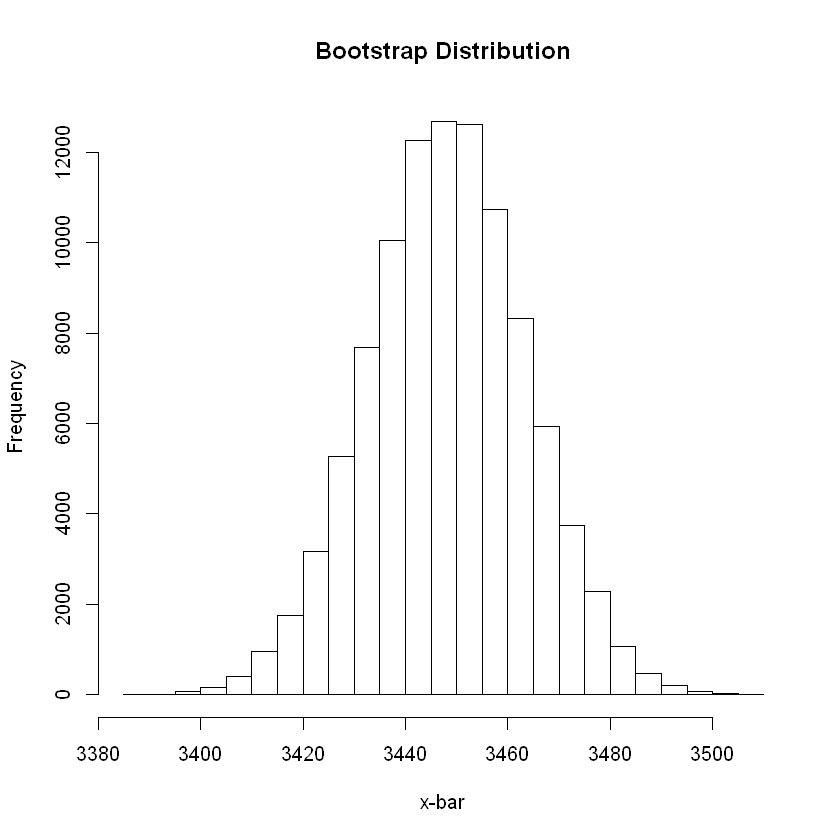

In [107]:
# Create a histogram of resulting bootstrap sample means
hist(result, xlab = "x-bar", main = "Bootstrap Distribution")

In [108]:
# Calculate center of the bootstrap distribution
mean(result)

[1] 3448.229

In [109]:
# Calculate standard error of the bootstrap distribution
sd(result)

[1] 15.36301

## Approximating Sampling Distribution with a Bootstrap Distribution

<img src="images/5-4.png" width="700" />

- Top left plot shows a distribution with mean 23 and variance 49

- Lower left plot shows a sample of the above plot

- Top right shows the actual sampling distribution

- Lower right shows bootstrap distribution

The table reveals that sd of the actual distribution and the bootstrap distribution are really close; means differ slightly i.e. there is bias


We can use bootstrap distribution as an estimate for the sampling distribution.

- The **center** of the bootstrap distribution is NOT an accurate approximation for the center of the sampling distribution.

- The **spread** of the bootstrap distribution DOES reflect the spread of the sampling distribution.

- The **skewness**  of the bootstrap distribution DOES reflect the skewness of the sampling distribution.

- **Shape** will be similar as well.

## The Plug-in Principle

To understand the principle, we will use the following example.

**Arsenic in Groundwater**

Arsenic is naturally occurring element in the groundwater in Bangladesh. Much of this water is used for drinking in rural areas, so arsenic poisoning is a serious health issue. The dataset `Bangladesh` contains measurements on arsenic, chlorine, and cobalt levels (in parts per billion, ppb) present in each of 271 groundwater samples. Using R, calculate the mean and standard deviation of the arsenic level of the sample

In [110]:
Arsenic <- resampledata::Bangladesh$Arsenic
length(Arsenic)
mean(Arsenic)
sd(Arsenic)

[1] 271

[1] 125.3199

[1] 297.9755

The data here is heavily right skewed; see the plot below.

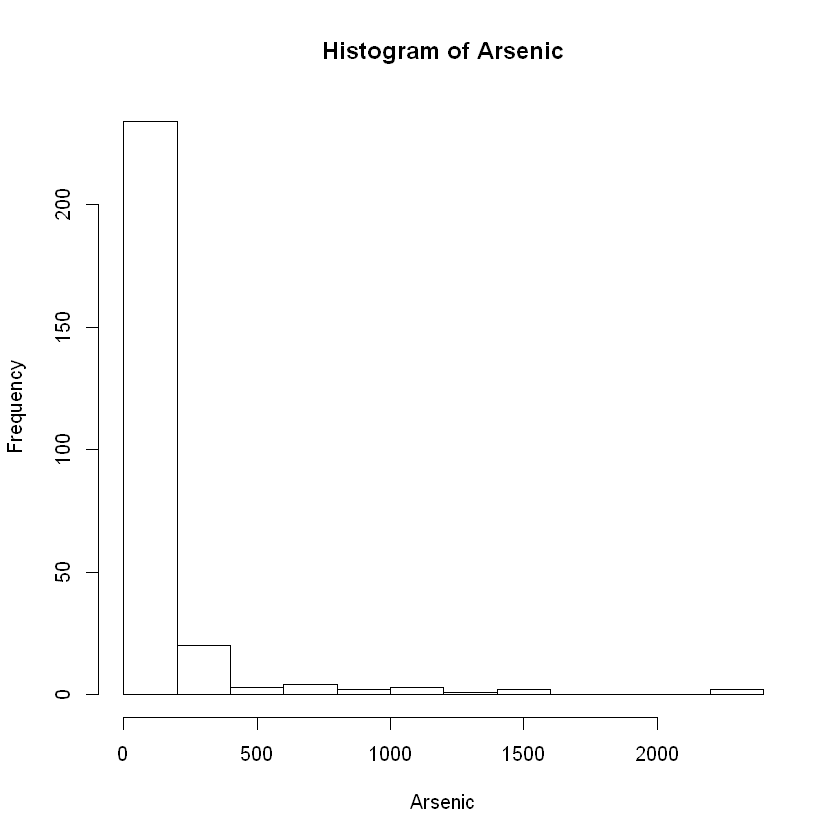

In [111]:
sample_mean <- mean(Arsenic)
sample_sd <- sd(Arsenic)
hist(Arsenic)

<span style="color:blue">**Plug-in Principle**: *To estimate a parameter $\theta$, use the relevant sample statistic denoted in general with a hat $\hat{\theta}$*.</span>

## Interval Estimate with Bootstrap Distribution

Based on the 271 groundwater samples in Bangladesh, we have $\mu \approx \bar{x} = 125.3199$ ppb. <span style="color:red">*How can we build some error into our estimate to account for the uncertainty due to randomness of the sampling*?</span>

In [112]:
n <- length(Arsenic) # number of obs
N <- 10^4 # number of bootstrap samples
boot_mean <- numeric(N) # means to stored

# Pick n values from the original sample with replacement
# Calculate mean of each boostrap sample

for (i in 1:N){
    x <- sample(Arsenic, size = n, replace = TRUE)
    boot_mean[i] <- mean(x)
}

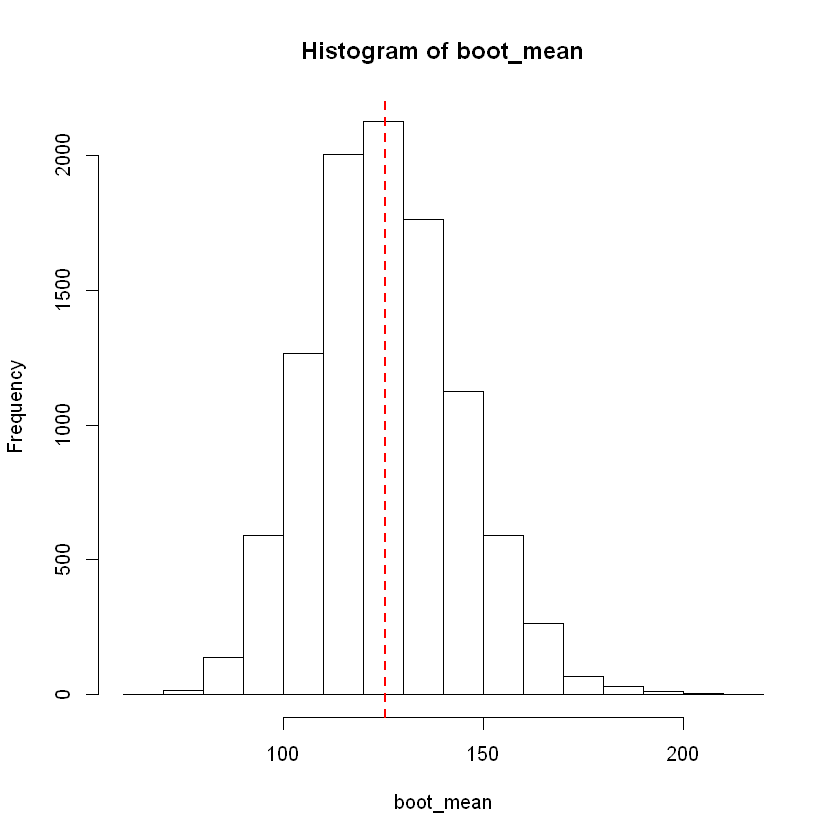

In [113]:
# Show bootstrap sample
hist(boot_mean)
abline(v = sample_mean, # sample_mean was previously created
       col = "red", lwd = 2, lty = 2) 

- Let $\mu$ denote the mean amount of arsenic (in all) groundwater in Bangladesh

- Using the **Plug-in Principle**, we get a **point estimate** $\mu \approx \bar{x} = 125.3199$ ppb.

- Let's build some error into our estimate to account for the randomness in sampling

- Usually when estimating an unknown population parameter, we give an **interval estimate** that gives range of plausible values for the parameter.


In [114]:
# Using empirical rule, we can construct the 95% interval

#calculate standard error
sd_error <- sd(boot_mean)
sd_error

[1] 18.28558

In [115]:
# upper interval
mean(boot_mean) + 2*sd_error

[1] 162.1078

In [116]:
# lower interval
mean(boot_mean) - 2*sd_error

[1] 88.96544

In [117]:
# direct calculation
quantile(boot_mean, c(0.025, .975))

2.5%     97.5% 
 92.30351 163.73959

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
The interval between the 2.5 and 97.5 percentiles of the bootstrap distribution of a statistic is a 95% bootstrap percentile confidence interval for the coresponding parameter.

- There is a 95% chance the interval contains the actual value of the population parameter.

- The success rate, 95%, is called the confidence interval.

Note that **the uncertainty is attached to the interval**, not the population parameter -- "it is what it is". 

**DO NOT SAY**: ~"95% chance the population parameter is in the interval"~
</ol>

</div>



## Two Sample Bootstrap Distribution

### Example: Length of Commercials
What is the difference between the length of commercials of basic cable channels and on extended cable channels? The table shows the total number of minutes devoted to commercials during randomly selected half-hour periods on basic and extended cable TV channels.


|        |   |    |    |    |   |   |   |    |    |  |  |  |
|:-----------|---:|----:|----:|----:|---:|---:|---:|----:|----:|---:|---:|---:|
|times_basic | 7.0| 10.0| 10.6| 10.2| 8.6| 7.6| 8.2| 10.4| 11.0| 8.5|  NA|  NA|
|times_ext   | 3.4|  7.8|  9.4|  4.7| 5.4| 7.6| 5.0|  8.0|  7.8| 9.6| 6.2| 8.1|


In [118]:
times_basic <- c(7, 10,  10.6, 10.2, 8.6, 7.6, 8.2, 10.4, 11, 8.5)
times_ext <- c(3.4, 7.8, 9.4,  4.7, 5.4, 7.6, 5, 8, 7.8, 9.6, 6.2, 8.1)

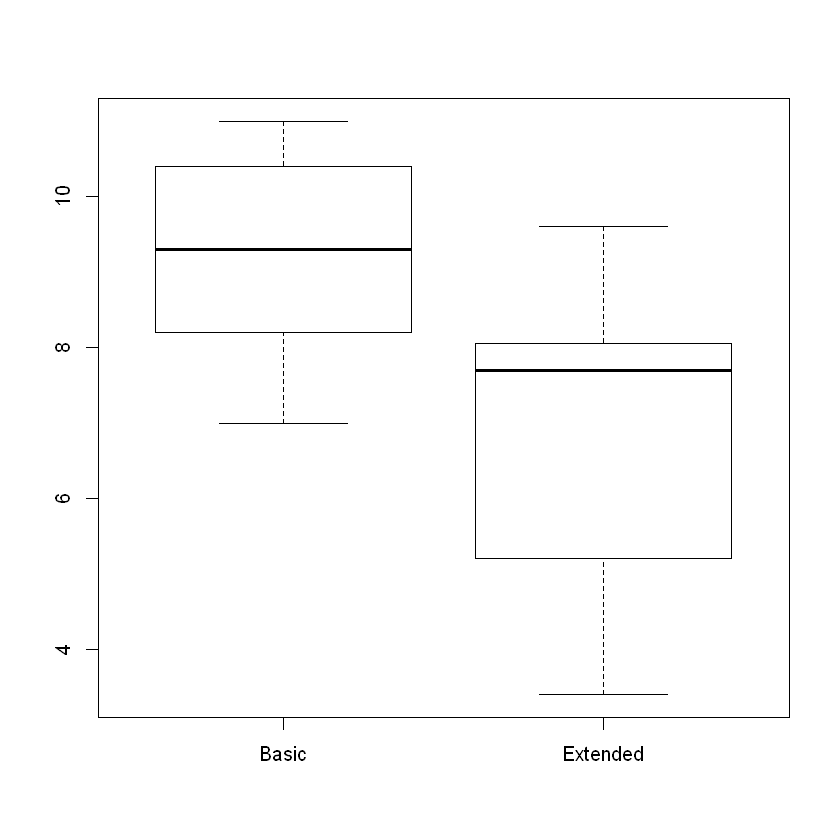

In [119]:
boxplot(times_basic, times_ext, names = c("Basic", "Extended"))

In [120]:
# mean basic
(mean_basic <- mean(times_basic))

# sd basic
(sd_basic <- sd(times_basic))

# n basic
(n_basic <- length(times_basic))

[1] 9.21

[1] 1.395588

[1] 10

In [121]:
# mean extended
(mean_ext <- mean(times_ext))

# sd extended
(sd_ext <- sd(times_ext))

# n extended
(n_ext <- length(times_ext))

[1] 6.916667

[1] 1.947882

[1] 12

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
Given independent samples of sizes m and n from two populations:

- Draw a resample of size m with replacement from the first sample

- Draw a resample for size  with replacement fromt he second sample
    
- Compute a statistic that compares the two groups, such as a difference in the two sample means
    
- Repeat resampling many times over
    
- Construct a bootstrap distribution of the statistic
    
Notice **we do not pool the two samples together** since there is no claim that there is no difference between the two populations.

</ol>

</div>

Give a **90% bootstrap percentile confidence interval** to estimate the difference between the length of commercial times and interpret your answer.

In [122]:
N <- 1e4 # number of resamples
mean_diff <- numeric(N)
for (i in 1:N){
    basic_boot <- sample(times_basic, size = n_basic, replace = TRUE)
    ext_boot <- sample(times_ext, size = n_ext, replace = TRUE)
    mean_diff[i] <- mean(basic_boot) - mean(ext_boot)
}

In [123]:
# Observed Difference
(observed_diff <- mean(times_basic) - mean(times_ext))
# Confidence Interval
(lower <- quantile(mean_diff, probs = .05))
(upper <- quantile(mean_diff, probs = .95))

[1] 2.293333

5% 
1.166583

95% 
3.431667

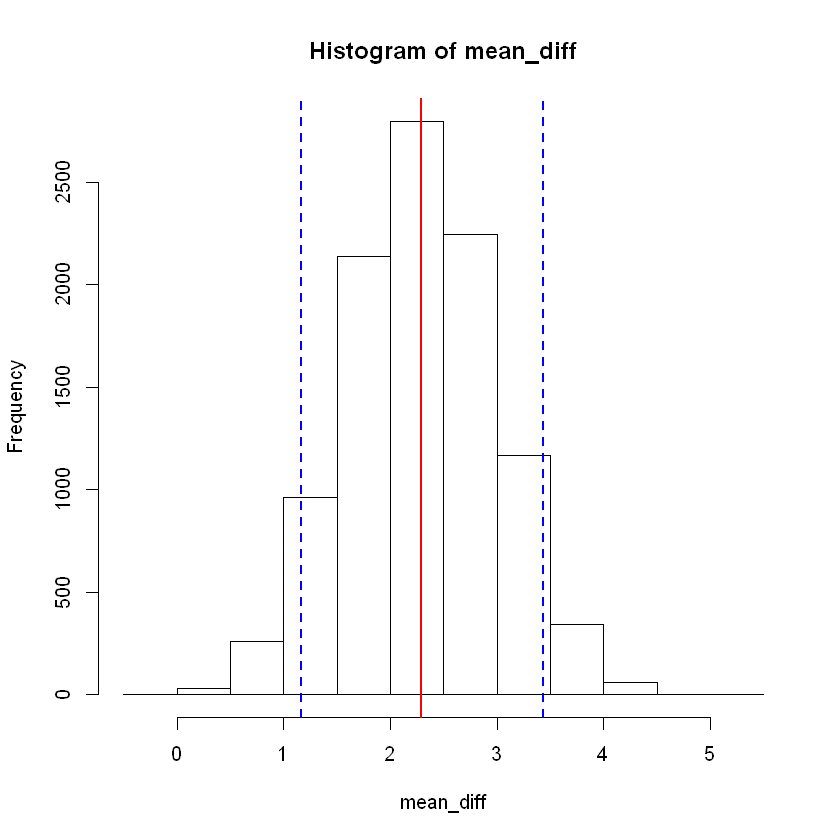

In [124]:
hist(mean_diff)
abline(v = observed_diff, col = "red", lwd = 2)
abline(v = lower, col = "blue", lwd = 2, lty = 2)
abline(v = upper, col = "blue", lwd = 2, lty = 2)

## Matched-Pair Bootstrapping

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>

Given matched samples each size n:
    
    
- For each pair calculate the difference
    
- Consider the collection of n differences as your original sample
    
- Draw a resample of size n with replacement fromt the sample of differences. Compute the relevant statistic.
    
- Repeat this many times.
    
- Construct the bootstrap distribution of the statistic.

</ol>

</div>


### Example: Wetsuit

Recall the wetsuit example where we compared the maximum velocity of 12 swimmers each with a wetsuit and with a normal bathing suit. If instead of hypothesis test, suppose we have no claim and wanto to estimate what is the average difference between maximum velocities of all swimmers with and without the wetsuit. The mean of the differences of sample is $\bar{x}_{dff} = 0.0755$ m/sec.

|Swimmer    |    1|    2|    3|    4|    5|    6|    7|    8|    9|   10|   11|   12|
|:----------|----:|----:|----:|----:|----:|----:|----:|----:|----:|----:|----:|----:|
|wetsuit    | 1.57| 1.47| 1.42| 1.35| 1.22| 1.75| 1.64| 1.57| 1.56| 1.53| 1.49| 1.51|
|no_wetsuit | 1.49| 1.37| 1.35| 1.27| 1.12| 1.64| 1.59| 1.52| 1.50| 1.45| 1.44| 1.41|
|<span style="color:green">**difference**</span> | 0.08| 0.10| 0.07| 0.08| 0.10| 0.11| 0.05| 0.05| 0.06| 0.08| 0.05| 0.10|

In [125]:
wetsuit <- c(1.57, 1.47, 1.42, 1.35, 1.22, 1.75,
             1.64, 1.57, 1.56, 1.53, 1.49, 1.51)
no_wetsuit <- c(1.49, 1.37, 1.35, 1.27, 1.12, 1.64,
                 1.59, 1.52, 1.5, 1.45, 1.44, 1.41)
# pairwise differences
pair_diff <- wetsuit - no_wetsuit
# mean difference
(mean_diff <- mean(pair_diff))

[1] 0.0775

**Construct a 95% bootstrap percentile confidence interval to estimate this difference and interpret your answer.**

In [126]:
sample_size <- length(pair_diff) 
number_of_resamples <- 1e5 
boot_mean_diff <- numeric(number_of_resamples) # where to be stored
for (i in 1:number_of_resamples){
    result  <- sample(pair_diff, size = sample_size, replace = TRUE)
    boot_mean_diff[i] <- mean(result)
}

In [127]:
(lower <- quantile(boot_mean_diff, probs = .025))
(upper <- quantile(boot_mean_diff, probs = 0.975))

2.5% 
0.06583333

97.5% 
0.08916667

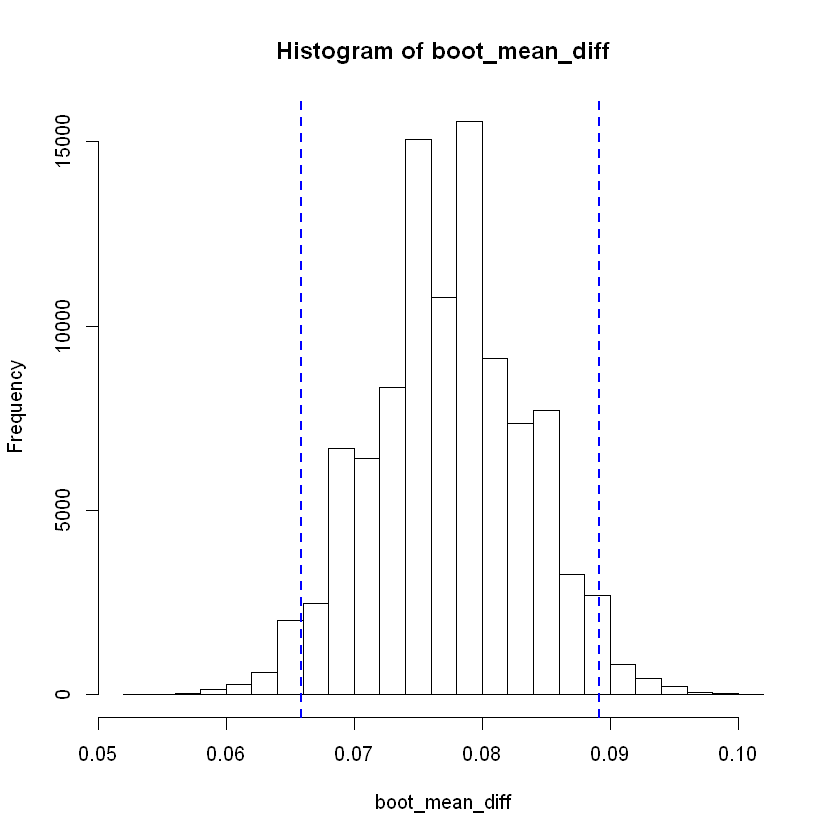

In [128]:
hist(boot_mean_diff)
abline(v = lower, col = "blue", lwd = 2, lty = 2)
abline(v = upper, col = "blue", lwd = 2, lty = 2)

## Bootstrap Distributions with Other Statistics

<https://www.youtube.com/watch?v=HLYZz2IzU4s&list=PLNyILlFU1DRfKsEkd5kRR3xb2si2HIwZX&index=11>

<https://www.youtube.com/watch?v=GyZJzlQUQ40&list=PLNyILlFU1DRfKsEkd5kRR3xb2si2HIwZX&index=12>


Verizon is the incumbent local exchange carreir (ILEC) for a large part of the Eastern US. When there is an emergency Verizon is responsible for making repairs for the customers of telephone companies in the region known as competing local exchange carriers (CLEC's). Verizon is subject to fines if repair times for CLEC customers are substantially worse than the times for Verizon customers. The dataset `Verizon` contains a sample of repair times (`Time`) for 1664 ILEC and 23 CLEC customers (`Group`).

1. Calculate the mean repair time for the sample of the ILEC customers.

2. Calculate the mean repair time for the sample of the CLEC customers.

3. Calculate the ration of $\frac{\bar{x}_{ILEC}}{\bar{x}_{CLEC}}$ and interpret the meaning of this value.

4. Why might regulators be more interested in comparing the ratio of the means rather than the difference of the means?

In [129]:
head(resampledata::Verizon)

Time,Group
17.50,ILEC
2.40,ILEC
0.00,ILEC
0.65,ILEC
22.23,ILEC
1.20,ILEC


In [130]:
table(resampledata::Verizon$Group)


CLEC ILEC 
  23 1664 

In [131]:
# Get vectors of data by Group
time_ilec <- subset(resampledata::Verizon, select = Time,
                    Group == "ILEC", drop = TRUE) # TRUE drops var names
time_clec <- subset(resampledata::Verizon, select = Time,
                    Group == "CLEC", drop = TRUE) # TRUE drops var names

# Find ratio: x-bar-ilac/x-bar-clec
(sample_ratio_mean <- mean(time_ilec)/mean(time_clec))

[1] 0.5095126

This ratio indicates that Verizon takes double time for other customers. This is suspicious!

**Construct a 95% bootstrap confidence interval for the ratio of the two means.**

In [132]:
number_of_resamples <- 10^4
boot_ratio_mean <- numeric(number_of_resamples)
for (i in 1:number_of_resamples){
    ilec_sample <- sample(time_ilec, size = length(time_ilec), replace = TRUE)
    clec_sample <- sample(time_clec, size = length(time_clec), replace = TRUE)
    boot_ratio_mean[i] <- mean(ilec_sample)/mean(clec_sample)
}

In [133]:
(lower <- quantile(boot_ratio_mean, probs = .025))
(upper <- quantile(boot_ratio_mean, probs = .975))

2.5% 
0.3223892

97.5% 
0.8328606

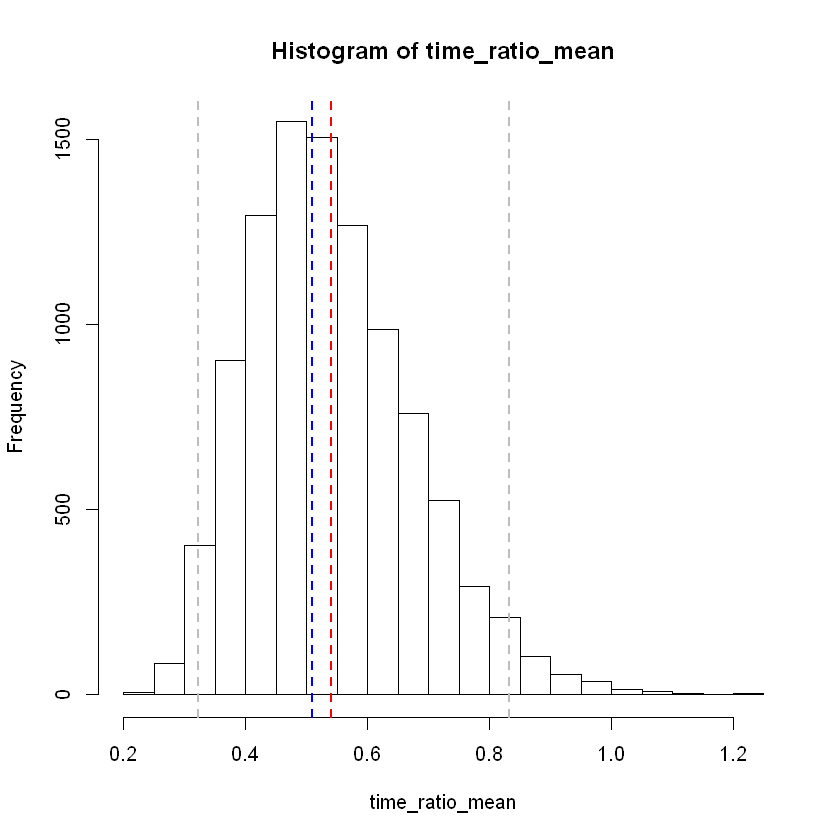

In [134]:
hist(time_ratio_mean)
abline(v = lower, col = "grey", lwd = 2, lty = 2)
abline(v = upper, col = "grey", lwd = 2, lty = 2)
abline(v = sample_ratio_mean, col = "blue", lwd = 2, lty = 2) # sample
abline(v = mean(boot_ratio_mean), col = "red", lwd = 2, lty = 2) # boot 

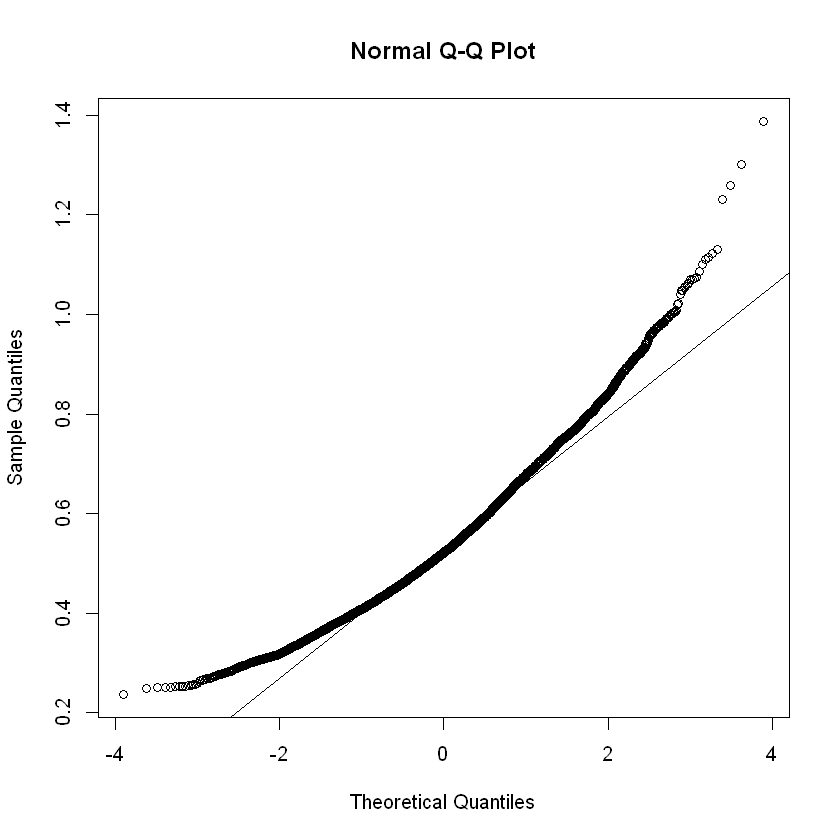

In [135]:
qqnorm(boot_ratio_mean)
qqline(time_ratio_mean)

In [136]:
sample_ratio_mean
mean(boot_ratio_mean) # Bias! The bootstrap ratio is slightly bigger due to the right skewed distribution

[1] 0.5095126

[1] 0.5396973

**We can construct confidence interval estimates for statistics even if there is no theoretical formula for the corresponding sampling distribution.**